<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterator

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta 

import os
import re

from functools import reduce 
from collections import defaultdict

from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'test.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'mock_sales_data.csv',
 'online_retail.xlsx',
 '1_order_payments_dataset.csv',
 '1_customers_dataset.csv',
 'groceries.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'online_retail_II.xlsx',
 'sales.csv',
 'match_result_test.csv',
 'scanner_data.csv',
 'sales_data_with_stores.csv',
 'mall_customers.csv',
 '1_orders_dataset.csv',
 'sales_vs_discount.csv',
 'sample-sales-data.csv',
 'ecommerce-data.csv',
 'sample_data']

In [5]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.columns = [re.sub(' ', '_', re.sub(' \(.+\)', '', a)).lower() for a in df.columns]
df.head()

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


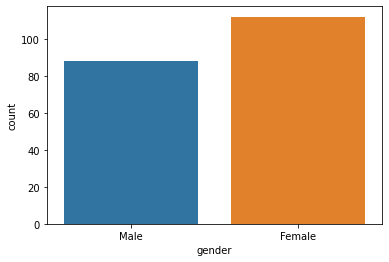

In [12]:
sns.countplot(data = df, x = 'gender')

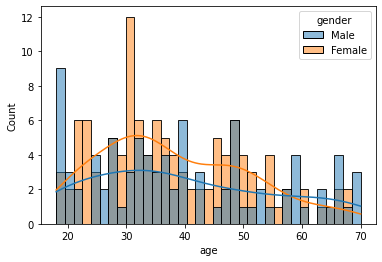

In [13]:
sns.histplot(data = df, x = 'age', hue = 'gender', kde = True, bins = 35)

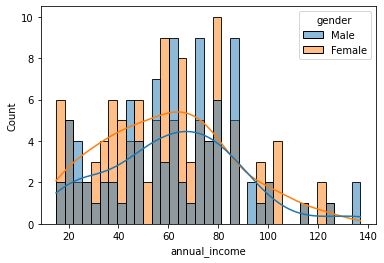

In [14]:
sns.histplot(data = df, x = 'annual_income', hue = 'gender', kde = True, bins = 35)

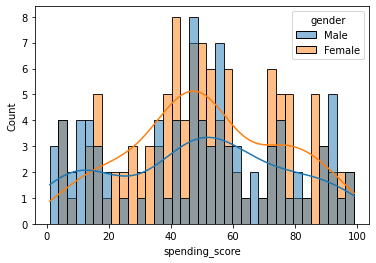

In [15]:
sns.histplot(data = df, x = 'spending_score', hue = 'gender', kde = True, bins = 35)

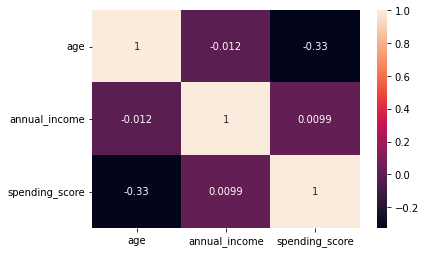

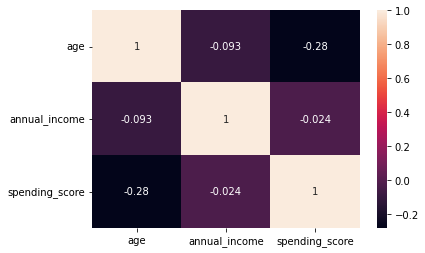

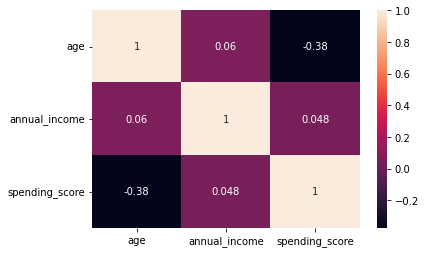

In [17]:
sns.heatmap(data = df.drop('customerid', axis = 1).corr(), annot = True)
plt.show()
sns.heatmap(data = df[df.gender == 'Male'].drop('customerid', axis = 1).corr(), annot = True)
plt.show()
sns.heatmap(data = df[df.gender == 'Female'].drop('customerid', axis = 1).corr(), annot = True)
plt.show()

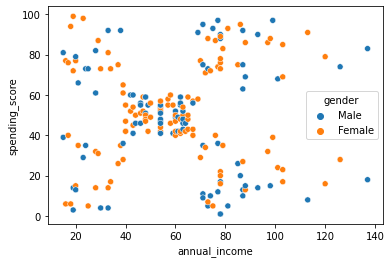

In [18]:
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'gender')

In [21]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df[['annual_income', 'spending_score']])

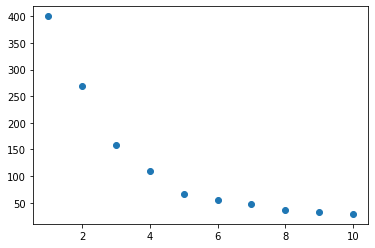

In [24]:
def get_eval(df, n) : 

  res = list()

  for i in range(1, n+1) :
    
    km = KMeans(n_clusters = i, random_state = 10)
    km.fit(df)
    res.append(km.inertia_)
  
  plt.plot(range(1, n+1), res, 'o')
  plt.show()

get_eval(df_std, 10)

In [25]:
km = KMeans(n_clusters = 5)
km.fit(df_std)
df['flag'] = km.fit_predict(df_std).astype(str)
df.head()

,customerid,gender,age,annual_income,spending_score,flag
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


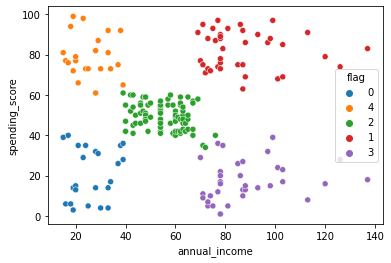

In [26]:
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'flag')

# Iterator

In [28]:
from string import ascii_lowercase
lt = list(ascii_lowercase) + list(range(10))

names = ['park', 'kim', 'ahn']

email1 = [''.join(np.random.choice(lt, np.random.randint(7,14, 1), replace = True)) for a in range(3)]
email2 = np.random.choice(['@gmail.com', '@msn.com', '@naver.com', '@nate.com', '@daum.net'], 3, replace = True)
email = [ a + b for a, b in zip(email1, email2)]

age = np.random.randint(30, 80, 3)
score = np.random.randint(2000, 3000, 3)


In [29]:
[{k : v} for k, v in zip(names, zip(email, age, score))]

[{'park': ('9o7c1z07f@gmail.com', 69, 2513)},
 {'kim': ('dotsrusc@gmail.com', 78, 2980)},
 {'ahn': ('j9k0ddm9d800l@nate.com', 66, 2709)}]